<div style="background:#FFFFAA">
<img src="logo.jpg", width=150, ALIGN="left", border=20>
<center>
<h1>Sample Starting Kit </h1>
 <br>This code was tested with <br>
Python 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) (https://anaconda.org/)<br>
<i> Adapted for Chalab by Isabelle Guyon from original code of Balázs Kégl</i> <br>
<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science (CDS)</a>
</center>
<br>
<br>
<br>
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div style="background:#FFFFAA">
    <h2>Introduction </h2>
    <p>
In an era where computer graphics techniques for image generation are reaching stunning levels of quality, it becomes more and more challenging to detect fake from true, authentic images. However, this raises a lot of legal issues, mainly dealing with forgery. This project focuses mainly on the efficiency of Generative Adversarial Network (GAN) algorithms for producing art forgery and we will try to beat the state-of-the-art models that detect it. In fact, the Fine Arts Expert Institute in Geneva estimates that as much as 50 percent of artworks currently in circulation may be forgeries. Although the standard approach for image classification which is deep neural networks and especially Convolutional Neural Networks (CNNs) works very well nowadays, GAN performs strongly on generating fake images. By focusing on the art forgery aspect, we will try to bring a more specific perspective on the issue of image forgery.

</div>

### Requirements
Our code uses multiple libraries, so the next cell will install python's required dependencies. In case you don't want to, or are running in the competition's docker, you can comment it.

In [1]:
#!pip install --user -r requirements.txt

In [2]:
%reload_ext autoreload
model_dir = 'sample_code_submission/'                        # Change the model to a better one once you have one!
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import warnings
import os
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<div style="background:#FFFFAA">
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
    <span style="color:red"> Just change the data name in the block below. In the rest of the section, replace the sample plots by anything you want. </span>
</div>

In [3]:
data_dir = '../public_data'         
data_name = 'perso'
!ls $data_dir

perso_feat.name   perso_public.info  perso_train.data	   perso_valid.data
perso_label.name  perso_test.data    perso_train.solution


In [4]:
from data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)          # The perso_data is loaded as a Pandas Data Frame

Reading ../public_data/perso_train from AutoML format
Number of examples = 65856
Number of features = 200
   Class
0  False
1   True
Number of classes = 2


In [5]:
data.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,target
0,-720.579708,-330.571966,-2188.381016,1636.259793,450.914411,2896.124291,990.411094,-221.979955,735.522150,658.305425,...,48.580091,72.751124,140.823452,233.252833,-125.343139,-11.203929,-298.022503,268.679125,-107.863398,False
1,-5322.933980,-2089.062676,-380.988992,1346.675402,-175.516347,-187.304026,-516.713746,299.742812,737.662192,367.725877,...,-11.319036,51.214428,-28.411065,-61.522861,3.005384,-0.986070,23.010128,26.574740,169.194344,False
2,-4200.092388,-1871.126468,447.135529,-1006.329809,-462.005764,74.704184,-389.507083,1048.262956,-943.557088,-372.852894,...,-59.611552,25.703768,-294.928181,35.586727,-82.896835,-139.520672,67.240814,130.350498,11.225183,False
3,-3185.549644,306.772873,433.077977,-210.809758,36.321483,-219.512936,-1054.496076,-410.837075,-1310.575500,-722.056874,...,-81.840073,70.061337,-167.365191,-33.844216,101.946416,-31.338004,-113.008504,19.829202,20.704420,False
4,4225.769673,2321.933013,340.961107,1458.868017,-149.674140,374.538303,1012.925872,-1814.882862,161.417185,-526.341569,...,65.427990,-65.920148,80.513158,-96.773541,52.067824,-55.347607,-50.855075,-38.701155,261.381070,False


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [6]:
data.describe() 

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199
count,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,...,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000,65856.000000
mean,7.948228,4.639587,0.060584,0.855769,0.357277,7.274473,-1.869317,-1.103966,-2.037879,-1.444957,...,-0.014606,-0.272984,-0.059105,0.246937,0.403709,0.143219,0.073579,-0.077973,-0.060606,-0.243602
std,4527.520299,2004.792136,1779.131964,1479.263773,1223.426107,1146.015959,969.066518,895.355556,786.722509,711.069693,...,125.708011,124.573000,124.085856,123.794939,122.868808,121.976787,122.081693,121.612663,120.540781,119.955238
min,-12742.430972,-9023.211696,-8421.497788,-9367.852309,-7187.540320,-6688.845174,-5695.292683,-5531.296531,-5411.785285,-4643.432207,...,-773.122053,-1027.098089,-1032.805878,-809.367433,-994.457441,-772.500641,-907.994302,-733.719626,-710.527240,-821.714025
25%,-3274.891219,-1177.313799,-1102.805327,-807.709460,-680.398415,-682.350395,-585.396431,-534.121973,-434.339013,-412.187668,...,-73.133615,-73.276018,-73.564071,-73.897173,-73.313577,-71.965030,-72.125558,-72.216912,-70.905623,-71.805017
50%,-195.286039,129.786316,-103.967754,146.154493,-3.505489,-18.044559,-55.113862,16.804429,-7.350562,6.081740,...,1.444448,1.216627,-0.868476,-0.641931,-0.213107,0.625010,-1.533394,-0.130634,0.410809,0.289759
75%,3083.881246,1257.955175,952.530743,952.914092,671.960261,682.672999,530.041801,541.486421,428.102311,411.366246,...,73.798601,72.928751,72.739949,73.366181,73.679866,72.218836,71.430684,72.728981,71.713926,71.651149
max,15055.474982,10698.120915,9554.132261,11444.055706,8174.589084,6336.943285,7427.424157,5547.592429,6218.223714,5376.299435,...,796.276702,1421.298186,744.646970,901.421396,1017.062212,882.567186,1289.488162,809.657357,833.619205,827.775638


<div style="background:#FFFFAA">
<h1>Step 2: Building a predictive model</h1>
</div>

<div style="background:#FFFFAA">
    <h2>Loading data with DataManager</h2>
    <p>
We reload the data with the AutoML DataManager class because this is more convenient:
  
</div>

In [7]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)
print(data_name)

Info file found : /home/tp-home009/rcesist/projects/picasso/public_data/perso_public.info
DataManager : perso
info:
	usage = Sample dataset perso data
	name = perso
	task = bi-class.classification
	target_type = Numerical
	feat_type = Numerical
	metric = bac_metric
	time_budget = 1200
	feat_num = 200
	target_num = 2
	label_num = 2
	train_num = 65856
	valid_num = 9408
	test_num = 18817
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(65856, 200)
	Y_train = array(65856,)
	X_valid = array(9408, 200)
	Y_valid = array(0,)
	X_test = array(18817, 200)
	Y_test = array(0,)
feat_type:	array(200,)
feat_idx:	array(0,)

perso


<div style="background:#FFFFAA">
    <h2>Training a predictive model</h2>
    <p>
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.
    </div>

In [8]:
from numpy.core.umath_tests import inner1d
from data_io import write
from model import model


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  """Entry point for launching an IPython kernel.


<div style="background:#FFFFAA">
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
    
</div>

In [9]:
M = model()
trained_model_name = model_dir + data_name
print(data_name)
print(model_dir)
print(trained_model_name)

perso
sample_code_submission/
sample_code_submission/perso


<div style="background:#FFFFAA">
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [10]:
if not(M.is_trained):
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    M.fit(X_train, Y_train)                     

Y_hat_train = M.predict(D.data['X_train'])
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])
if(os.path.exists("sample_data/perso_test.solution") and os.path.exists("sample_data/perso_valid.solution")) : 
    Y_test = D.data['Y_test']
    Y_valid = D.data['Y_valid']

FIT: dim(X)= [65856, 200]
FIT: dim(y)= [65856, 1]
PREDICT: dim(X)= [65856, 200]
PREDICT: dim(y)= [65856, 1]
PREDICT: dim(X)= [9408, 200]
PREDICT: dim(y)= [9408, 1]
PREDICT: dim(X)= [18817, 200]
PREDICT: dim(y)= [18817, 1]


<div style="background:#FFFFAA">
    <b> Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.
</div>

In [11]:
M.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/perso_test.predict
sample_result_submission/perso_train.predict
sample_result_submission/perso_valid.predict


In [12]:
print(len(Y_hat_train))

65856


<div style="background:#FFFFAA">
    <h2>Scoring the results</h2>
    <h3>Load the challenge metric</h3>
</div>

#### Metric : AUC_metric 
ROC curves are typically used in binary classification to study the output of a classifier

In [13]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: roc_auc_score


<div style="background:#FFFFAA">
    <h3> Training performance </h3>
    <p>
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.
        </div>

Training score for the roc_auc_score metric = 0.9173
Ideal score for the roc_auc_score metric = 1.0000


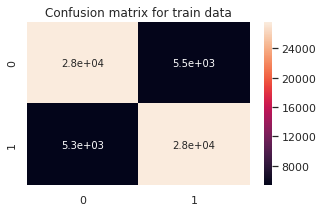

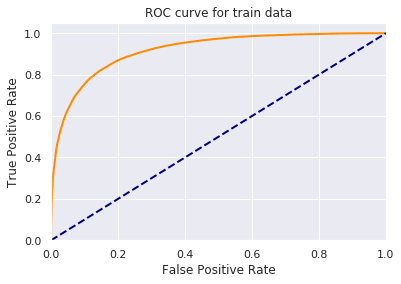

In [14]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
n_classes=2
def fpr_tpr(solution, prediction):
    for i in range(n_classes):
        fpr, tpr, _ = metrics.roc_curve(solution, prediction)
        roc_auc = metrics.auc(fpr, tpr)
    return (fpr,tpr)
def p2c(prediction,threshold=0.5) : 
    c = []
    for ele in prediction : 
        if(ele>=0.5) : 
            c.append(1)
        else : 
            c.append(0)
    return np.array(c)

def plot_cm_matrix(solution,prediction,title) :
    prediction = p2c(prediction)
    cm = confusion_matrix(solution, prediction)
    df_cm = pd.DataFrame(cm, index = [i for i in "01"],columns = [i for i in "01"])
    plt.figure(figsize = (5,3))
    sn.heatmap(df_cm, annot=True)
    plt.title(title)

def plot_ROC(fpr,tpr,title) :
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.show()
    
fpr_train,tpr_train = fpr_tpr(Y_train, Y_hat_train)    
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))
plot_cm_matrix(Y_train,Y_hat_train,"Confusion matrix for train data") 
plot_ROC(fpr_train,tpr_train,"ROC curve for train data")

if False: #(os.path.exists("sample_data/perso_test.solution") and os.path.exists("sample_data/perso_valid.solution")) : 
    fpr_train,tpr_train = fpr_tpr(Y_train, Y_hat_train)
    fpr_test,tpr_test = fpr_tpr(Y_test, Y_hat_test)
    fpr_valid,tpr_valid = fpr_tpr(Y_valid, Y_hat_valid)

    print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
    print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))
    print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_test, Y_hat_test))
    print('Valid score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_valid, Y_hat_valid))

    plot_cm_matrix(Y_train,Y_hat_train,"Confusion matrix for train data") 
    plot_ROC(fpr_train,tpr_train,"ROC curve for train data")
    plot_cm_matrix(Y_test,Y_hat_test,"Confusion matrix for test data") 
    plot_ROC(fpr_test,tpr_test,"ROC curve for test data")
    plot_cm_matrix(Y_valid,Y_hat_valid,"Confusion matrix for valid data") 
    plot_ROC(fpr_valid,tpr_valid,"ROC curve for valid data")

<div style="background:#FFFFAA">
    <h3>Cross-validation performance</h3>
    <p>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.
   </div>

In [15]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

FIT: dim(X)= [52684, 200]
FIT: dim(y)= [52684, 1]
PREDICT: dim(X)= [13172, 200]
PREDICT: dim(y)= [13172, 1]
FIT: dim(X)= [52685, 200]
FIT: dim(y)= [52685, 1]
PREDICT: dim(X)= [13171, 200]
PREDICT: dim(y)= [13171, 1]
FIT: dim(X)= [52685, 200]
FIT: dim(y)= [52685, 1]
PREDICT: dim(X)= [13171, 200]
PREDICT: dim(y)= [13171, 1]
FIT: dim(X)= [52685, 200]
FIT: dim(y)= [52685, 1]
PREDICT: dim(X)= [13171, 200]
PREDICT: dim(y)= [13171, 1]
FIT: dim(X)= [52685, 200]
FIT: dim(y)= [52685, 1]
PREDICT: dim(X)= [13171, 200]
PREDICT: dim(y)= [13171, 1]

CV score (95 perc. CI): 0.83 (+/- 0.00)


<div style="background:#FFFFAA">
<h1> Step 3: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [16]:
!python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Using input_dir: /home/tp-home009/rcesist/projects/picasso/public_data
Using output_dir: /home/tp-home009/rcesist/projects/picasso/starting_kit/sample_result_submission
Using program_dir: /home/tp-home009/rcesist/projects/picasso/starting_kit/ingestion_program
Using submission_dir: /home/tp-home009/rcesist/projects/picasso/starting_kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Perso ********
************************************************
========= Reading and converting data ==========
Info file found : /home/tp-home009/rcesist/projects/picasso/public_data/perso_public.info
========= Reading /home/tp-home009/rcesist/projects/picasso/public_data/perso_feat.type
[+] Success in  0.00 sec
========= Reading /home/tp-home009/rcesist/projects/picasso/public_data/perso_train.data
Replace missing values by 0 (slow, sorry)
[+] Success in  3.03 sec
========= Reading /home/tp-home009/rce

<div style="background:#FFFFAA">
Also test the scoring program:
    </div>

In [17]:
scoring_output_dir = '../scoring_output_dir'
!python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

======= Set 1 (Perso_train): roc_auc_score(set1_score)=0.835871400565 =======


<div style="background:#FFFFAA">
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [18]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = 'sample_code_submission_' + the_date + '.zip'
sample_result_submission = 'sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
sample_code_submission_19-03-01-16-46.zip
sample_result_submission_19-03-01-16-46.zip
